In [130]:
from obspy import read
from obspy.signal.trigger import ar_pick
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [131]:
st1 = read('data/earthquake/st1.SAC')
st2 = read('data/earthquake/st2.SAC')
st3 = read('data/earthquake/st3.SAC')

threechannels = read('data/earthquake/st1.SAC')
threechannels += read('data/earthquake/st2.SAC')
threechannels += read('data/earthquake/st3.SAC')

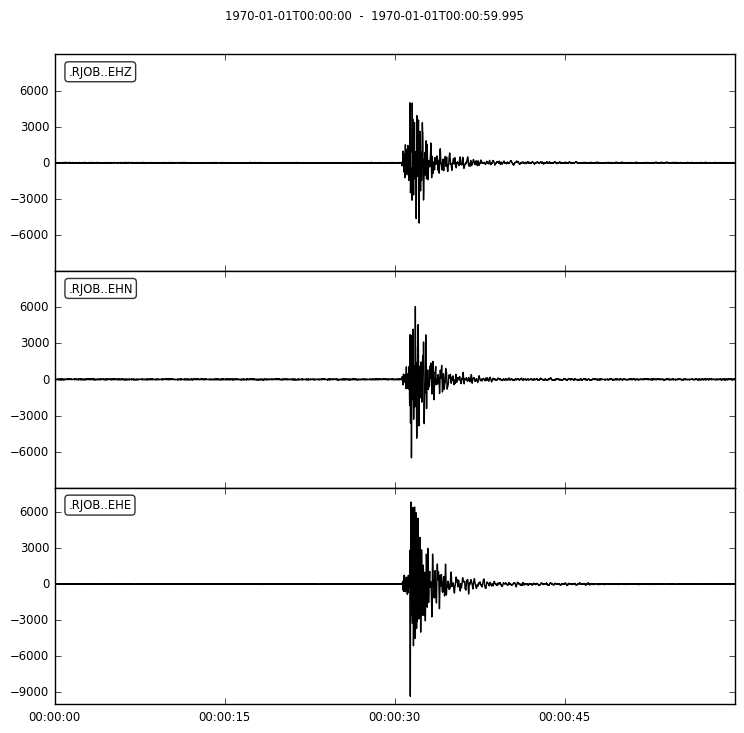

In [132]:
threechannels.plot()

In [133]:
Mt = np.sqrt(st1[0].data**2+st2[0].data**2+st3[0].data**2)

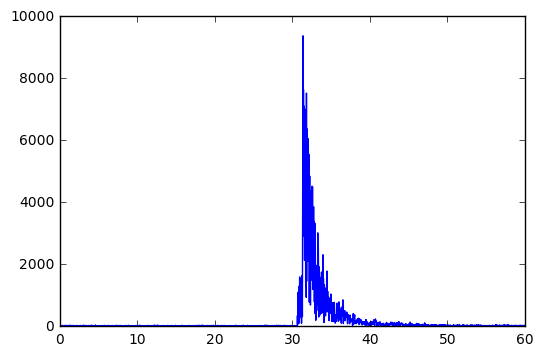

In [134]:
sampling_rate = 1/st1[0].stats.sampling_rate
number_of_samples = st1[0].stats.npts
t = np.arange(0,sampling_rate*number_of_samples,sampling_rate)

plt.plot(t,Mt)

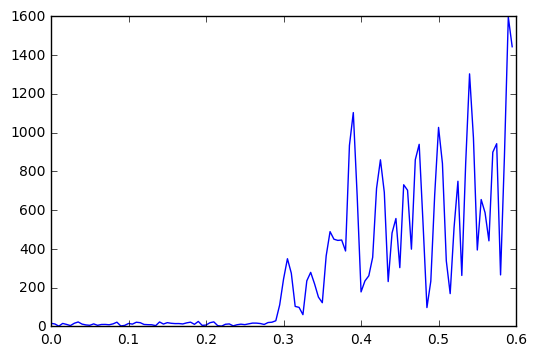

In [135]:
t2 = np.arange(0,sampling_rate*120,sampling_rate)
plt.plot(t2,Mt[6068:6188])

In [136]:
#Axx = (2 / (np.max(tr1.data)-np.min(tr1.data))*(tr1.data-np.max(tr1.data)))+ 1
#Ayy = (2 / (np.max(tr2.data)-np.min(tr2.data))*(tr2.data-np.max(tr2.data)))+ 1
#Azz = (2 / (np.max(tr3.data)-np.min(tr3.data))*(tr3-np.max(tr3.data)))+ 1

In [137]:
#p at [6068:6188]
#pmid at [6125:6135]
#s [6180:6300]
#smid at [6235:6245]

In [138]:
x = st1[0].data
y = st2[0].data
z = st3[0].data

In [140]:
window = 10

dop = dict()
for i in np.arange(0,number_of_samples,window):
    C11=((x[i:i+window]-x.mean()) * (x[i:i+window]-x.mean())).sum(0) / window
    C12=((x[i:i+window]-x.mean()) * (y[i:i+window]-y.mean())).sum(0) / window
    C13=((x[i:i+window]-x.mean()) * (z[i:i+window]-z.mean())).sum(0) / window
    C21=C12
    C22=((y[i:i+window]-y.mean()) * (y[i:i+window]-y.mean())).sum(0) / window
    C23=((y[i:i+window]-y.mean()) * (z[i:i+window]-z.mean())).sum(0) / window
    C31=C13
    C32=C23
    C33=((z[i:i+window]-z.mean()) * (z[i:i+window]-z.mean())).sum(0) / window
    C = np.array([[C11,C12,C13],[C21,C22,C23],[C31,C32,C33]])
    
    #e = lambda1,lambda2,lambda3    
    e = np.linalg.eigvals(C)
    #trs = lambda1+lambda2+lambda3
    trs=e.sum()
    #tr(s**2)=lambda1**2+lambda2**2+lambda3**2
    trs2=(e**2).sum()
    dop[i] = (3*trs2-trs**2)/(2*trs**2)    

In [152]:
t3 = np.arange(0,sampling_rate*10,sampling_rate)

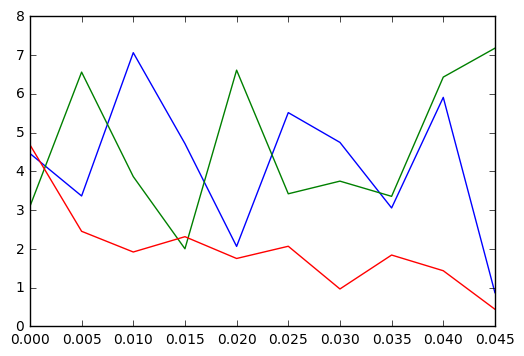

In [156]:
plt.plot(t3,dop[0]*Mt[0:10])
plt.plot(t3,dop[10]*Mt[10:20])
plt.plot(t3,dop[20]*Mt[20:30])